In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Подключаем библиотеки

1. Деревья решений

1.1 Подключитесь к набору данных. Разберитесь в том, как устроен датасет и какова постановка задачи. Сделайте необходимый препроцессинг данных

In [3]:
#Загрузка данных
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Статистика по числовым признакам
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Датасет состоит из данных маркетингового банка(возраст клиента, образование, баланс и тд). Target переменная - deposit. Цель прогнозной модели - проанализировать данные и выяснить внесет ли человек депозит.


In [6]:
df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

Целевой признак (target) - deposit. Задача обучения - классификация, так как имеет конечное количество ответов("да" или "нет")

Сделайте необходимый препроцессинг данных (удаление лишних признаков, кодирование категориальных признаков, логарифмирование целевой переменной, масштабирование)

Преобразование категориальных признаков проведем путём кодирования с помощью map()

Для признаков имеющих больше двух параметров воспользуемся get_dummies()

In [7]:
new_values = {'yes':  1, 'no': 0} 
df['deposit1'] = df['deposit'].map(new_values)
df['housing1'] = df['housing'].map(new_values)
df['loan1'] = df['loan'].map(new_values)

df['default1'] = df['default'].map(new_values)
df['contact'].value_counts()

new_values_1 = {'cellular':  1, 'unknown': 0,'telephone' : 1 } 
df['contact1'] = df['contact'].map(new_values_1)
df['contact1'].value_counts()

new_values_2 = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec':12}
df['month1'] = df['month'].map(new_values_2)

df = df.drop(['deposit','housing','loan','default','contact', 'month'], axis = 1)

df = pd.get_dummies(df, columns=['marital','poutcome','education'])
df.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
balance,2343,45,1270,2476,184
day,5,5,5,5,5
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
deposit1,1,1,1,1,1
housing1,1,0,1,1,0


1.2 Разбейте набор данных на обучающую и валидационную (тестовую) выборки с помощью метода train_test_split .

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('deposit1', axis=1).drop('job',axis = 1)
y = df['deposit1'] 


# Разделение
# test_size --- доля исходных данных, которую оставляем для валидации
# random_state --- произвольное целое число, для воспроизводимости случайных результатов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   housing1             11162 non-null  int64
 8   loan1                11162 non-null  int64
 9   default1             11162 non-null  int64
 10  contact1             11162 non-null  int64
 11  month1               11162 non-null  int64
 12  marital_divorced     11162 non-null  uint8
 13  marital_married      11162 non-null  uint8
 14  marital_single       11162 non-null  uint8
 15  poutcome_failure     11162 non-null  uint8
 16  poutcome_other       1

In [9]:
print(X_train.shape, y_train.shape)

(8371, 23) (8371,)


In [10]:
print( X_valid.shape, y_valid.shape)

(2791, 23) (2791,)


1.3 Обучите алгоритм классификации DecisionTreeClassifier. Оцените качество каждой модели на отложенной выборке с помощью accuracy_score.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3, random_state=2019)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)
print('Качество модели:', accuracy_score(y_pred, y_valid))

Качество модели: 0.7567180222142601


2. Настройка гиперпараметров дерева


2.1 Создайте генератор разбиений, помешивающий выборку перед созданием блоков. Число блоков равно 5.

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
scores = cross_val_score(tree, X, y, cv=kf, scoring='accuracy')
print('Массив значений метрики:', scores)

Массив значений метрики: [0.76085983 0.77966861 0.75492832 0.77912186 0.77060932]


2.2 Осуществите кросс-валидацию модели для подбора гиперпараметров. Используйте GridSearchCV. Интервалы изменения гиперпараметров задайте самостоятельно.


In [13]:
# Кросс-валидация и подбор гиперпараметров
from sklearn.model_selection import GridSearchCV

tree_params_depth = {'max_depth': np.arange(2, 11)}

tree_grid_depth = GridSearchCV(tree, tree_params_depth, cv=5, scoring='accuracy') # кросс-валидация по 5 блокам
tree_grid_depth.fit(X_train, y_train)
tree_grid_depth.best_params_
m_depth = tree_grid_depth.best_params_['max_depth']
print(m_depth)

9


In [14]:
tree_params_split = {'min_samples_split': np.arange(2,21)}

tree = DecisionTreeClassifier(max_depth = m_depth)
tree_grid_samples_split = GridSearchCV(tree, tree_params_split, cv=5, scoring='accuracy')
tree_grid_samples_split.fit(X_train, y_train)
tree_grid_samples_split.best_params_
m_split = tree_grid_samples_split.best_params_['min_samples_split']
print(m_split)

20


In [15]:
tree_params_leaf = {'min_samples_leaf':np.arange(2,21)}

tree = DecisionTreeClassifier(max_depth = m_depth, min_samples_split = m_split)
tree_grid_samples_leaf = GridSearchCV(tree, tree_params_leaf, cv=5, scoring='accuracy')
tree_grid_samples_leaf.fit(X_train, y_train)
tree_grid_samples_leaf.best_params_
m_leaf = tree_grid_samples_leaf.best_params_['min_samples_leaf']
print(m_leaf)

15


In [16]:
tree_params_features = {'max_features':np.arange(2,21)}

tree = DecisionTreeClassifier(max_depth = m_depth, min_samples_split = m_split, min_samples_leaf = m_leaf)
tree_grid_features = GridSearchCV(tree, tree_params_features, cv=5, scoring='accuracy')
tree_grid_features.fit(X_train, y_train)
tree_grid_features.best_params_
m_features = tree_grid_features.best_params_['max_features']
print(m_features)

19


2.3 Постройте валидационные кривые. Сделайте выводы.

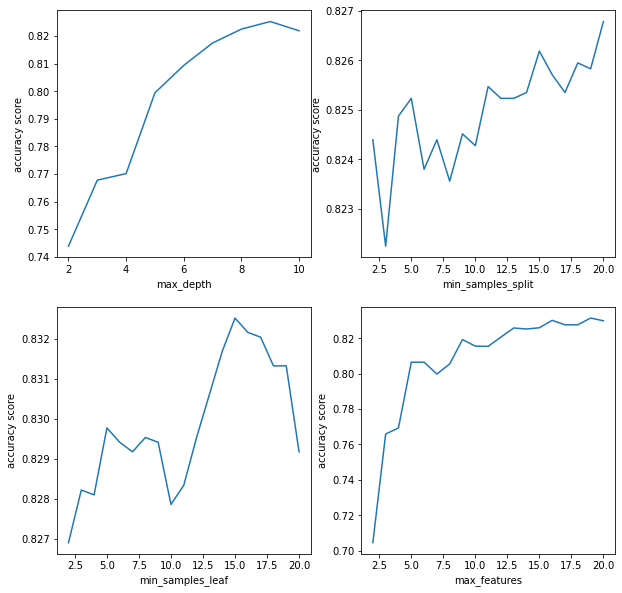

In [17]:
# Валидационная кривая
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (10,10))

ax[0, 0].set_xlabel('max_depth')
ax[0, 0].set_ylabel('accuracy score')
ax[0, 0].plot(tree_params_depth['max_depth'], tree_grid_depth.cv_results_['mean_test_score']);

ax[0, 1].set_xlabel('min_samples_split')
ax[0, 1].set_ylabel('accuracy score')
ax[0, 1].plot(tree_params_split['min_samples_split'], tree_grid_samples_split.cv_results_['mean_test_score']);

ax[1, 0].set_xlabel('min_samples_leaf')
ax[1, 0].set_ylabel('accuracy score')
ax[1, 0].plot(tree_params_leaf['min_samples_leaf'], tree_grid_samples_leaf.cv_results_['mean_test_score']);

ax[1, 1].set_xlabel('max_features')
ax[1, 1].set_ylabel('accuracy score')
ax[1, 1].plot(tree_params_features['max_features'], tree_grid_features.cv_results_['mean_test_score']);


Вывод: набор гиперпараметров хороший, но не лучший(не удалось подобрать все 4 гиперпараметра одновременно)

2.4 Постройте графически полученное дерево. Оцените важность признаков.

In [18]:
tree = DecisionTreeClassifier(max_depth = m_depth, min_samples_split = m_split, min_samples_leaf = m_leaf, max_features = m_features, random_state=19)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=19, min_samples_leaf=15,
                       min_samples_split=20, random_state=19)

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns)
print(open('tree.dot').read())

digraph Tree {
node [shape=box] ;
0 [label="duration <= 206.5\ngini = 0.499\nsamples = 8371\nvalue = [4394, 3977]"] ;
1 [label="pdays <= 9.5\ngini = 0.327\nsamples = 3424\nvalue = [2719, 705]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="month1 <= 4.5\ngini = 0.245\nsamples = 2660\nvalue = [2279, 381]"] ;
1 -> 2 ;
3 [label="day <= 27.5\ngini = 0.492\nsamples = 445\nvalue = [251, 194]"] ;
2 -> 3 ;
4 [label="duration <= 77.5\ngini = 0.499\nsamples = 357\nvalue = [172, 185]"] ;
3 -> 4 ;
5 [label="education_tertiary <= 0.5\ngini = 0.15\nsamples = 61\nvalue = [56, 5]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.34\nsamples = 23\nvalue = [18, 5]"] ;
5 -> 7 ;
8 [label="day <= 6.5\ngini = 0.477\nsamples = 296\nvalue = [116, 180]"] ;
4 -> 8 ;
9 [label="month1 <= 2.5\ngini = 0.469\nsamples = 96\nvalue = [60, 36]"] ;
8 -> 9 ;
10 [label="education_secondary <= 0.5\ngini = 0.356\nsamples = 69\nvalue = [53, 16]"] ;
9 -

[Ссылка на гугл-диск с картинкой](https://drive.google.com/file/d/1oiC1LRZHSS5olsEmKnkWzjFOc_SfgiVF/view?usp=sharing)

Feature ranking:
1 duration 0.5099516862827888
2 poutcome_success 0.09309603601162528
3 contact1 0.09091930526557314
4 month1 0.07867285436350852
5 day 0.058118329047211
6 pdays 0.05688101586602577
7 age 0.042013232928928994
8 housing1 0.04059692790754163
9 balance 0.024584583260677098
10 marital_married 0.00227586369648701
11 education_secondary 0.0013731987742801335
12 poutcome_other 0.0009537525916166512
13 education_tertiary 0.0005632140037360213
14 poutcome_failure 0.0
15 marital_single 0.0
16 marital_divorced 0.0
17 default1 0.0
18 loan1 0.0
19 previous 0.0
20 poutcome_unknown 0.0
21 campaign 0.0
22 education_primary 0.0
23 education_unknown 0.0


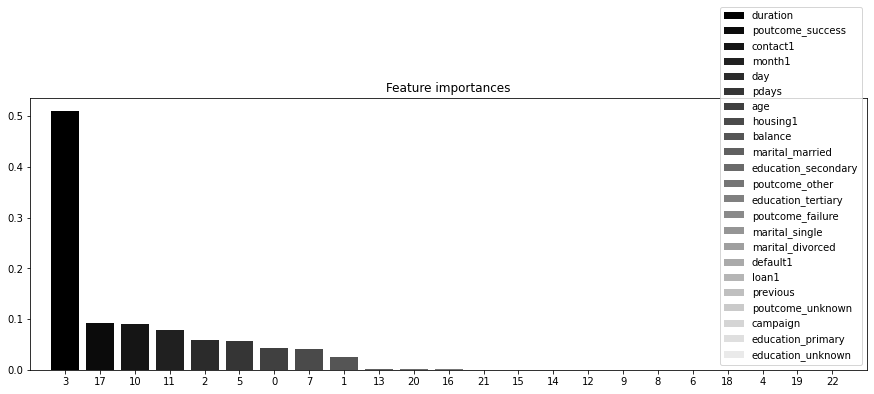

In [20]:
features = dict(zip(range(len(X.columns)), X.columns))

# Важность признаков
importances = tree.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(X.columns))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

Вывод: 'duration' - самый влиятельный признак. После него идут 'month', 'contact' и далее по убыванию. Самыми не влиятельными признаками оказались 'poutcome', 'education'.

3. Случайный лес

3.1 Постройте модельь случайного леса для вашей задачи с гиперпараметрами по умолчанию и оцените качество модели.

In [21]:
# Обучение случайного леса
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_valid, y_pred))

0.8384091723396632


3.2 Осуществите подбор гиперпараметров модели

In [22]:
rf_params_estimators = {"n_estimators":[50, 100, 150, 200, 350, 400]}
rf_estimators = GridSearchCV(rf, rf_params_estimators, cv=5, scoring='accuracy')
rf_estimators.fit(X_train, y_train)
rf_estimators.best_params_


{'n_estimators': 200}

In [23]:
rf_params_depth = {'max_depth': np.arange(2, 11)}
rf = RandomForestClassifier(random_state = 19, n_estimators = 200)
rf_grid_depth = GridSearchCV(rf, rf_params_depth, cv=5, scoring='accuracy') 
rf_grid_depth.fit(X_train, y_train)
rf_grid_depth.best_params_

{'max_depth': 10}

In [24]:
rf_params_split = {'min_samples_split': np.arange(2, 21)}
rf = RandomForestClassifier(random_state = 19, n_estimators = 200, max_depth = 10)
rf_grid_split = GridSearchCV(rf, rf_params_split, cv=5, scoring='accuracy') 
rf_grid_split.fit(X_train, y_train)
rf_grid_split.best_params_

{'min_samples_split': 5}

In [25]:
rf_params_leaf = {'min_samples_leaf': np.arange(2, 21)}
rf = RandomForestClassifier(random_state = 19, n_estimators = 200, max_depth = 10, min_samples_split = 5)
rf_grid_leaf = GridSearchCV(rf, rf_params_leaf, cv=5, scoring='accuracy') 
rf_grid_leaf.fit(X_train, y_train)
rf_grid_leaf.best_params_

{'min_samples_leaf': 7}

In [26]:
rf_params_features = {'max_features': np.arange(2, 21)}
rf = RandomForestClassifier(random_state = 19, n_estimators = 200, max_depth = 10, min_samples_split = 5, min_samples_leaf= 7)
rf_grid_features = GridSearchCV(rf, rf_params_features, cv=5, scoring='accuracy') 
rf_grid_features.fit(X_train, y_train)
rf_grid_features.best_params_

{'max_features': 15}

Набор гиперпараметров:

n_estimators = 200

max_depth = 10

min_samples_split = 5

min_samples_leaf = 7

max_features = 15

3.3 Постройте валидационные кривые для каждого из гиперпараметров.

IndexError: index 2 is out of bounds for axis 1 with size 2

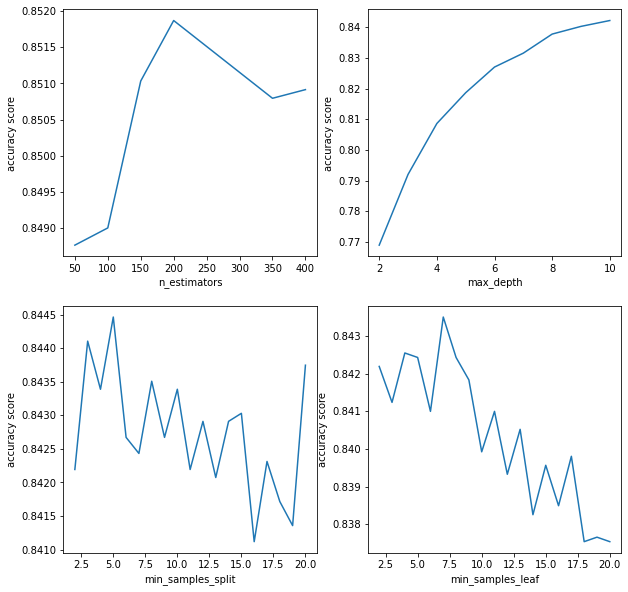

In [27]:
# Валидационная кривая
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (10,10))

ax[0,0].set_xlabel('n_estimators')
ax[0,0].set_ylabel('accuracy score')
ax[0,0].plot(rf_params_estimators['n_estimators'], rf_estimators.cv_results_["mean_test_score"]);

ax[0, 1].set_xlabel('max_depth')
ax[0, 1].set_ylabel('accuracy score')
ax[0, 1].plot(rf_params_depth['max_depth'], rf_grid_depth.cv_results_['mean_test_score']);

ax[1, 0].set_xlabel('min_samples_split')
ax[1, 0].set_ylabel('accuracy score')
ax[1, 0].plot(rf_params_split['min_samples_split'], rf_grid_split.cv_results_['mean_test_score']);

ax[1, 1].set_xlabel('min_samples_leaf')
ax[1, 1].set_ylabel('accuracy score')
ax[1, 1].plot(rf_params_leaf['min_samples_leaf'], rf_grid_leaf.cv_results_['mean_test_score']);

ax[1, 2].set_xlabel('max_features')
ax[1, 2].set_ylabel('accuracy score')
ax[1, 2].plot(rf_params_features['max_features'], rf_grid_features.cv_results_['mean_test_score']);

 3.4 Оцените важность признаков данной модели. Визуализируйте топ-10 самых полезных признаков.

Feature ranking:
1 duration 0.5099516862827888
2 poutcome_success 0.09309603601162528
3 contact1 0.09091930526557314
4 month1 0.07867285436350852
5 day 0.058118329047211
6 pdays 0.05688101586602577
7 age 0.042013232928928994
8 housing1 0.04059692790754163
9 balance 0.024584583260677098
10 marital_married 0.00227586369648701
11 education_secondary 0.0013731987742801335
12 poutcome_other 0.0009537525916166512
13 education_tertiary 0.0005632140037360213
14 poutcome_failure 0.0
15 marital_single 0.0
16 marital_divorced 0.0
17 default1 0.0
18 loan1 0.0
19 previous 0.0
20 poutcome_unknown 0.0
21 campaign 0.0
22 education_primary 0.0
23 education_unknown 0.0


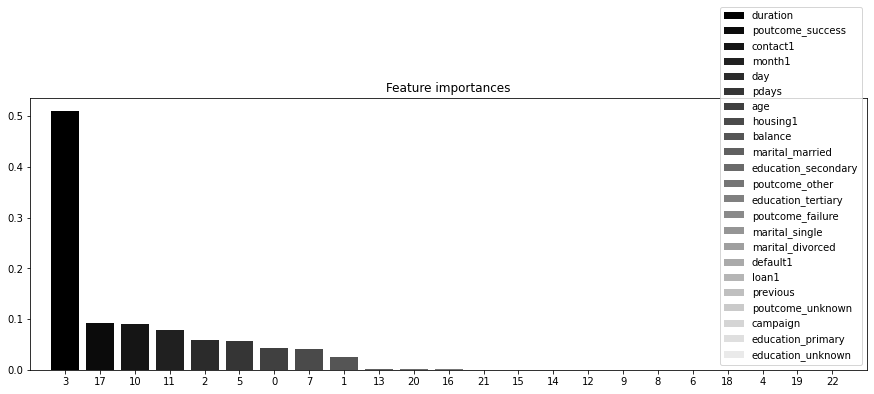

In [28]:
features = dict(zip(range(len(X.columns)), X.columns))

# Важность признаков
importances = tree.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(X.columns))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

Наиболее влиятельными оказались те же признаки, что и для дерева решений - 'duration', 'month' и тд. И самыми наименее значимыми признаками оказались также 'poutcome' и 'education'.

3.5 Сравните результаты метода ближайших соседей, дерева решений и случайного леса. Сформулируйте выводы.

Метод ближайших соседей является самым времязатратным и подходящим только для небольших исследований, качество модели худшее среди всех. Дерево решений справляется с задачами намного быстрее метода ближайших соседей, качество модели лучше чем в случае kNN. Случайный лес также является неплохим методом по сравнению с kNN, качество модели было лучшим среди всех, однако в данном случае(при большом кол-ве деревьев) работал очень долго. 